In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

## scale our data

In [5]:
X_train = X_train/255
X_test= X_test/255

## Builds our neurone

In [6]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4678 - accuracy: 0.8784
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3040 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2835 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2617 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2531 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

In [8]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2667 - accuracy: 0.9245


[0.2667330503463745, 0.9244999885559082]

In [9]:
y_test[11]

6

In [10]:
predicted=model.predict(X_test)

In [11]:
predicted[11]

array([7.6630414e-03, 1.1840761e-03, 1.4852786e-01, 1.9849241e-02,
       4.5840144e-03, 8.1205368e-04, 8.5634875e-01, 4.6895407e-06,
       1.4063624e-01, 4.3473716e-05], dtype=float32)

In [12]:
np.argmax(predicted[11])

6

In [13]:
predicted_labels=[np.argmax(i) for i in predicted]

In [14]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [15]:
predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

Text(69.0, 0.5, 'truth predict')

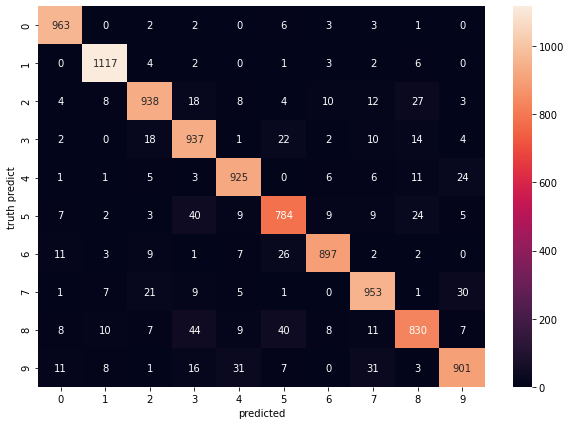

In [16]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth predict')

In [34]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
tb_call_back=tf.keras.callbacks.TensorBoard(log_dir="../call-back-logs/SGD",histogram_freq=1)
model.compile(
optimizer='SGD',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


##  train our model

In [35]:
model.fit(X_train,y_train,epochs=10,callbacks=[tb_call_back])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6472 - accuracy: 0.8354
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3349 - accuracy: 0.9065
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2876 - accuracy: 0.9190
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9274
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2364 - accuracy: 0.9345
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2186 - accuracy: 0.9389
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2040 - accuracy: 0.9431
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1908 - accuracy: 0.9470
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1794 - accuracy: 0.9499
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.169

In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0962 - accuracy: 0.9732


[0.09615437686443329, 0.9732000231742859]

In [22]:
y_test[2]

1

In [23]:
predicted=model.predict(X_test)

In [24]:
predicted[2]

array([1.0337830e-03, 9.9791414e-01, 5.5835515e-02, 2.0658970e-03,
       7.1960986e-03, 7.4615479e-03, 2.9684305e-03, 9.7478330e-02,
       4.7640407e-01, 3.2573938e-04], dtype=float32)

In [25]:
np.argmax(predicted[2])

1

In [26]:
predicted_labels=[np.argmax(i) for i in predicted]

In [27]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [28]:
predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(69.0, 0.5, 'truth predict')

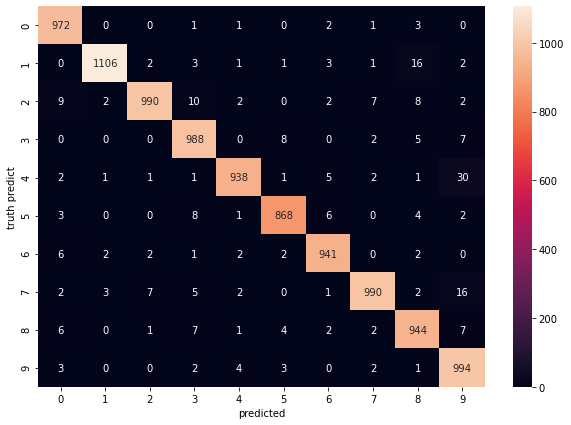

In [29]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth predict')